Usage of tsfresh to extract some features

https://tsfresh.readthedocs.io/en/latest/

1. Data

Se copiaron datos registrados con ingest por el datacube en la máquina de ixchel hacia:

`/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data`

de sentinel:

`s2_l2a_10m_scl_s3_39_-30*.nc`

No se usa la funcionalidad del datacube (gridworkflow load) pues se requiere que estén en la ruta:

`/shared_volume/datacube/datacube_ingest/s2_l2a_10m_scl_s3/mexico/`

pero el `shared_volume` es de `LUSTRE` y no de la máquina de Ixchel... se prefiere no tener los datos en la ruta de la línea anterior y mejor usar la de `tasks`... al final el load no importa para la creación de las series de tiempo...



In [1]:
%matplotlib inline
import matplotlib
from madmex.wrappers import gwf_query
from datetime import datetime
import datetime as dt
import xarray as xr
import numpy as np
from madmex.util.xarray import to_float, to_int
from datacube.api import GridWorkflow
import glob

In [2]:
path = '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/' 

In [3]:
sr_0_no_chunks = xr.open_mfdataset(path +'/s2_l2a_10m_scl_s3_39_-30*.nc',
                                  data_vars='minimal', coords='minimal',
                                  combine='by_coords')

In [4]:
sr_0_no_chunks

<xarray.Dataset>
Dimensions:   (time: 10, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    dataset   (time) |S4869 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    date_created:           2019-10-09T15:02:04.310545
    Conventions:            CF-1.6, ACDD-1.3
    h

In [5]:
sr_0_no_chunks.time

<xarray.DataArray 'time' (time: 10)>
array(['2019-01-07T17:18:02.000000000', '2019-02-06T17:18:04.000000000',
       '2019-02-13T17:08:09.000000000', '2019-02-16T17:17:57.000000000',
       '2019-02-16T17:18:04.000000000', '2019-02-26T17:18:03.000000000',
       '2019-02-26T17:18:11.000000000', '2019-03-08T17:18:02.000000000',
       '2019-03-28T17:18:07.000000000', '2019-04-04T17:08:13.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

In [6]:
sr_0 = sr_0_no_chunks.chunk({'time': -1})

In [7]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 10, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    dataset   (time) |S4869 dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    date_created:           2019-10-09T15:02:04.310545
    Conventions:            CF-1.6, ACDD-1.3

In [8]:
sr_0['ndvi'] = ((sr_0.nir-sr_0.red)/(sr_0.nir+sr_0.red))

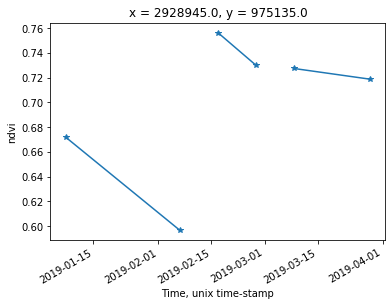

In [9]:
sr_0.ndvi[:,100,100].plot(marker="*")

In [9]:
begin="2019-01-1"

In [10]:
begin_time = datetime.strptime(begin, '%Y-%m-%d')

In [11]:
ts_1 = sr_0.ndvi.resample(time='10D', 
                          loffset=begin_time - 
                          datetime.utcfromtimestamp(sr_0['time'][0].values.astype(datetime)*1e-9)).nearest().interpolate_na('time')

In [12]:
ts_1

<xarray.DataArray 'ndvi' (time: 9, y: 5002, x: 5002)>
dask.array<transpose, shape=(9, 5002, 5002), dtype=float32, chunksize=(9, 5002, 5002), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2018-12-31T06:41:58 ... 2019-03-21T06:41:58
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05

In [13]:
ts_1['time']

<xarray.DataArray 'time' (time: 9)>
array(['2018-12-31T06:41:58.000000000', '2019-01-10T06:41:58.000000000',
       '2019-01-20T06:41:58.000000000', '2019-01-30T06:41:58.000000000',
       '2019-02-09T06:41:58.000000000', '2019-02-19T06:41:58.000000000',
       '2019-03-01T06:41:58.000000000', '2019-03-11T06:41:58.000000000',
       '2019-03-21T06:41:58.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-12-31T06:41:58 ... 2019-03-21T06:41:58
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

In [ ]:
ts_1[:,100,100].plot(marker="*")

In [16]:
ts_1_pd_series = ts_1.to_series()